In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline  
import emcee
import math
import matplotlib
from pylab import *
import matplotlib.patheffects as PathEffects
hfont = {'fontname':'Times New roman'}


mpl.rcParams['legend.numpoints'] = 1



plot_path = '/Users/alex/Desktop/final_files/correct_precision/paper2/cddfs/'


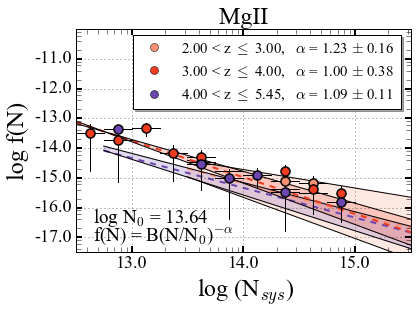

In [2]:
###################################################
#
#
# 2 < z < 2.99
#
x = np.array([pow(10.0, 12.6250), pow(10.0, 12.8750), 
              pow(10.0, 13.1250), pow(10.0, 13.3750), 
              pow(10.0, 13.6250),  
              pow(10.0, 14.3750), pow(10.0, 14.6250),
              pow(10.0, 14.8750)])

xbound_low = np.array([pow(10.0, 12.6250-0.125),
                       pow(10.0, 12.8750-0.125), pow(10.0, 13.1250-0.125), 
                       pow(10.0, 13.3750-0.125), pow(10.0, 13.6250-0.125), 
                       pow(10.0, 13.8750-0.125),  
                       pow(10.0, 14.3750-0.125), pow(10.0, 14.6250-0.125), 
                       pow(10.0, 14.8750-0.125)])

xbound_high = np.array([pow(10.0, 12.6250 + 0.125),
                        pow(10.0, 12.8750 + 0.125), pow(10.0, 13.1250 + 0.125), 
                        pow(10.0, 13.3750 + 0.125), pow(10.0, 13.6250 + 0.125), 
                        pow(10.0, 13.8750 + 0.125), 
                        pow(10.0, 14.3750 + 0.125), pow(10.0, 14.6250 + 0.125),
                        pow(10.0, 14.8750 + 0.125)])

y = np.array([4.5244810937e-13 ,
              2.48289659478e-13,
              6.38729736787e-13,
              9.22893334315e-14,
              6.65768470332e-14,
              2.29939747115e-14,
              5.63903195421e-15,
              4.1249825629e-15 ])/13.6980979692

yerr = np.array([4.28762326112e-13,
                 2.38183430453e-13,
                 2.8647768422e-13,
                 8.16597383649e-14,
                 5.20108368293e-14,
                 1.28895944792e-14,
                 4.7866812384e-15,
                 3.0700347266e-15])/13.6980979692


###################################################
#
# 3.00 < z < 3.95
#

x1 = np.array([pow(10, 13.6250), 
               pow(10, 14.3750), 
               pow(10, 14.6250)])

xbound_low1 = np.array([pow(10, 13.6250-0.125), 
                        pow(10, 14.3750-0.125), 
                        pow(10, 14.6250-0.125)])
xbound_high1 = np.array([pow(10, 13.6250 + 0.125), 
                         pow(10, 14.3750 + 0.125), 
                         pow(10, 14.6250 + 0.125)])

y1 = np.array([5.18981060628e-14,
               1.18392236265e-14,
               1.04378211718e-14])/15.0932703536

yerr1 = np.array([4.59206454868e-14,
                  9.24898002324e-15,
                  6.51234133597e-15])/15.0932703536

###################################################
#
# 4.03 < z < 5.48
#
x2 = np.array([pow(10.0, 12.8750),
              pow(10.0, 13.6250),
              pow(10.0, 13.8750), pow(10.0, 14.1250),
              pow(10.0, 14.3750), pow(10.0, 14.8750)])

xbound_low2 = np.array([pow(10.0, 12.8750 - 0.125),
                        pow(10.0, 13.6250 - 0.125),
                        pow(10.0, 13.8750 - 0.125), pow(10.0, 14.1250 - 0.125),
                        pow(10.0, 14.3750 - 0.125), pow(10.0, 14.8750 - 0.125)])

xbound_high2 = np.array([pow(10.0, 12.8750 + 0.125),
                        pow(10.0, 13.6250 + 0.125),
                        pow(10.0, 13.8750 + 0.125), pow(10.0, 14.1250 + 0.125),
                        pow(10.0, 14.3750 + 0.125), pow(10.0, 14.8750 + 0.125)])

y2 = np.array([1.04423939568e-12,
                7.33537155837e-14,
                2.48289659478e-14,
                3.12561110857e-14,
                8.04579157003e-15,
                3.74389123877e-15])/24.8372040807

yerr2 = np.array([4.88463667953e-13,
                    5.45937954241e-14,
                    2.38183430453e-14,
                    2.00400915107e-14,
                    7.62459216326e-15,
                    2.92478429068e-15])/24.8372040807



xfit  = np.array([pow(10, 12.5), pow(10, 17.5)])
x1fit = np.array([pow(10, 13.5), pow(10, 17.5)])
x2fit = np.array([pow(10, 12.75), pow(10, 17.5)])

###################################################
# fit parameters
# 106.827, 5.000,       2.10000   ,   2.99000, "mg2",       13.0000
#
alpha = -1.23
alpha_error = 0.16
logB = -14.536660 
logb_error = 0.14
N0 = pow(10.0, 13.64)


fit_values = pow(10.0, logB)*pow(xfit/N0, alpha)
fit_values_low = pow(10.0, logB - logb_error)*pow(xfit/N0, alpha-alpha_error)
fit_values_high = pow(10.0, logB + logb_error)*pow(xfit/N0, alpha+alpha_error)
###################################################
###################################################
# fit parameters
#  46.1401      5.00000      3.00000      3.95000 mg2
#
alpha1 = -1.00
alpha_error1 = 0.38
logB1 = -14.828783 
logb_error1 = 0.33
N0 = pow(10.0, 13.64)

fit_values1 = pow(10.0, logB1)*pow(x1fit/N0, alpha1)
fit_values_low1 = pow(10.0, logB1 - logb_error1)*pow(x1fit/N0, alpha1-alpha_error1)
fit_values_high1 = pow(10.0, logB1 + logb_error1)*pow(x1fit/N0, alpha1+alpha_error1)
###################################################
###################################################
# fit parameters
# 12.8500       5.00000      5.19000      6.20000c4
#

alpha2 = -1.09
alpha_error2 = 0.11
logB2 = -14.975103
logb_error2 = 0.17
N0 = pow(10.0, 13.64)

fit_values2 = pow(10.0, logB2)*pow(x2fit/N0, alpha1)
fit_values_low2 = pow(10.0, logB2 - logb_error2)*pow(x2fit/N0, alpha2-alpha_error2)
fit_values_high2 = pow(10.0, logB2 + logb_error2)*pow(x2fit/N0, alpha2+alpha_error2)
###################################################



# x and y ranges and scale
plt.xlim([pow(10.0, 12.5),pow(10, 15.5)])
plt.ylim([pow(10.0, -17.5), pow(10, -10.0)] )
plt.xscale('log')
plt.yscale('log')

# x and y ticks
xlabels = ['13.0', '14.0',  '15.0']
plt.xticks([pow(10.0, 13.0), pow(10.0, 14.0),
            pow(10.0, 15.0)], 
            xlabels, **hfont, fontsize = 18)
ylabels = ['-11.0', '-12.0','-13.0', '-14.0', '-15.0', '-16.0', '-17.0']
plt.yticks([pow(10.0, -11.0), pow(10.0, -12.0),
            pow(10.0, -13.0), pow(10.0, -14.0), 
            pow(10.0, -15.0), pow(10.0, -16.0),
            pow(10.0, -17.0)], 
            ylabels, **hfont, fontsize = 18)

plt.grid(True)

# define the colors
fullzcolor = [240.0/256.0, 59.0/256.0, 32.0/256.0]
z2color = [107/256.0, 70/256.0, 177/256.0]
z1color = [252/256.0, 146/256.0, 114/256.0] 

# plot the best fit filled area
plt.plot(x1fit, fit_values1, '--', lw=2.0, color = z1color)
plt.plot(x1fit, fit_values_low1, 'k-', lw=1.0)
plt.plot(x1fit, fit_values_high1, 'k-', lw=1.0)
plt.fill_between(x1fit, fit_values_high1, fit_values_low1, color = z1color, alpha = 0.2)

plt.plot(x2fit, fit_values2, '--', lw=2.0, color = z2color)
plt.plot(x2fit, fit_values_low2, 'k-', lw=1.0)
plt.plot(x2fit, fit_values_high2, 'k-', lw=1.0)
plt.fill_between(x2fit, fit_values_high2, fit_values_low2, color = z2color, alpha = 0.2)
                 
plt.plot(xfit, fit_values, '--', lw=2.0, color = fullzcolor)
plt.plot(xfit, fit_values_low, 'k-', lw=1.0)
plt.plot(xfit, fit_values_high, 'k-', lw=1.0)
plt.fill_between(xfit, fit_values_high, fit_values_low, color = fullzcolor, alpha = 0.2)



# plot the error_bars
for i in range(0, len(x)):
    plt.plot([x[i], x[i]], [y[i] - yerr[i], y[i] + yerr[i]], 'k-', lw=1.0)
for i in range(0, len(x1)):
    plt.plot([x1[i], x1[i]], [y1[i] - yerr1[i], y1[i] + yerr1[i]], 'k-', lw=1.0)
for i in range(0, len(x2)):
    plt.plot([x2[i], x2[i]], [y2[i] - yerr2[i], y2[i] + yerr2[i]], 'k-', lw=1.0)


# plot the x boundaries
for i in range(0, len(x)):
    plt.plot([xbound_low[i], xbound_high[i]], [y[i], y[i]], 'k-', lw=1.0)

for i in range(0, len(x1)):
    plt.plot([xbound_low1[i], xbound_high1[i]], [y1[i], y1[i]], 'k-', lw=1.0)    
 
for i in range(0, len(x2)):
    plt.plot([xbound_low2[i], xbound_high2[i]], [y2[i], y2[i]], 'k-', lw=1.0)    


# plot the data
plt.plot(x1, y1, 'ko', markersize=10, alpha=1.0)  
plt.plot(x1, y1, 'o', markersize=8, alpha=1.0, color = z1color,
         label="2.00 < z $\leq$ 3.00,   $\\alpha$ = 1.23 $\pm$ 0.16")   

plt.plot(x, y, 'ko', markersize=10, alpha=1.0)  
plt.plot(x, y, 'o', markersize=8, alpha=1.0, color = fullzcolor,
         label="3.00 < z $\leq$ 4.00,   $\\alpha$ = 1.00 $\pm$ 0.38")   


plt.plot(x2, y2, 'ko', markersize=10, alpha=1.0)  
plt.plot(x2, y2,  'o', markersize=8, alpha=1.0, color = z2color,
        label="4.00 < z $\leq$ 5.45,   $\\alpha$ = 1.09 $\pm$ 0.11")   


# x, y labels and title
plt.xlabel(' log (N$_{sys}$)', **hfont,  fontsize=24)
plt.ylabel('log f(N)', **hfont,  fontsize=24)
plt.title(' MgII ', **hfont,  fontsize=24)

plt.tick_params(direction='in', length=6, width=2)
plt.tick_params(which='minor', length=5)

# add legend
plt.rc('legend',**{'fontsize':15})
plt.rc('font',family='Times New Roman')
plt.legend(bbox_to_anchor=(1.055, 1.1), loc=1, borderaxespad=1.9, shadow=True)


txt4 = plt.text(pow(10.0, 12.65), pow(10.0, -16.5), 
                "log N$_{0}$ = 13.64", 
                **hfont,  fontsize=19, color = 'k')


txt3 = plt.text(pow(10.0, 12.65), pow(10.0, -17.1), 
                "f(N) = B(N/N$_{0}$)$^{-\\alpha}$", 
                **hfont,  fontsize=19, color = 'k')


plot_path = '/Users/alex/Desktop/final_files/correct_precision/paper2/cddfs/plots/'
plot_name = plot_path + 'mg2cddf.png'
plt.savefig(plot_name, bbox_inches='tight', figsize=[12,9], dpi=500)





In [3]:
x = np.array([ 12.6250,  12.8750, 
               13.1250,  13.3750, 
               13.6250,  
               14.3750,  14.6250,
               14.8750])

xbound_low = np.array([ 12.6250-0.125,
                        12.8750-0.125,  13.1250-0.125, 
                        13.3750-0.125,  13.6250-0.125, 
                        13.8750-0.125,  
                        14.3750-0.125,  14.6250-0.125, 
                        14.8750-0.125])

xbound_high = np.array([ 12.6250 + 0.125,
                         12.8750 + 0.125,  13.1250 + 0.125, 
                         13.3750 + 0.125,  13.6250 + 0.125, 
                         13.8750 + 0.125, 
                         14.3750 + 0.125,  14.6250 + 0.125,
                         14.8750 + 0.125])


x1 = np.array([ 13.6250, 
                14.3750, 
                14.6250])

xbound_low1 = np.array([ 13.6250-0.125, 
                         14.3750-0.125, 
                         14.6250-0.125])
xbound_high1 = np.array([ 13.6250 + 0.125, 
                          14.3750 + 0.125, 
                          14.6250 + 0.125])

x2 = np.array([ 12.8750,
               13.6250,
               13.8750,  14.1250,
               14.3750,  14.8750])

xbound_low2 = np.array([ 12.8750 - 0.125,
                         13.6250 - 0.125,
                         13.8750 - 0.125,  14.1250 - 0.125,
                         14.3750 - 0.125,  14.8750 - 0.125])

xbound_high2 = np.array([ 12.8750 + 0.125,
                         13.6250 + 0.125,
                         13.8750 + 0.125,  14.1250 + 0.125,
                         14.3750 + 0.125,  14.8750 + 0.125])


xfit  = np.array([ 12.5,  17.5])
x1fit = np.array([ 13.5,  17.5])
x2fit = np.array([ 12.75,  17.5])

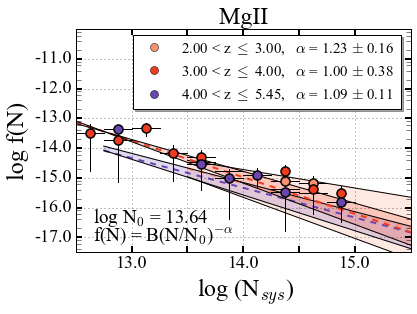

In [4]:


# x and y ranges and scale
plt.xlim([12.5, 15.5])
plt.ylim([pow(10.0, -17.5), pow(10, -10.0)] )
#plt.xscale('log')
plt.yscale('log')

# x and y ticks
xlabels = ['13.0', ' ', '14.0', ' ', '15.0']
plt.xticks([13.0, 13.5, 14.0, 14.5, 15.0], 
            xlabels, **hfont, fontsize = 18)
ylabels = ['-11.0', '-12.0','-13.0', '-14.0', '-15.0', '-16.0', '-17.0']
plt.yticks([pow(10.0, -11.0), pow(10.0, -12.0),
            pow(10.0, -13.0), pow(10.0, -14.0), 
            pow(10.0, -15.0), pow(10.0, -16.0),
            pow(10.0, -17.0)], 
            ylabels, **hfont, fontsize = 18)

plt.grid(True)

# define the colors
fullzcolor = [240.0/256.0, 59.0/256.0, 32.0/256.0]
z2color = [107/256.0, 70/256.0, 177/256.0]
z1color = [252/256.0, 146/256.0, 114/256.0] 

# plot the best fit filled area
plt.plot(x1fit, fit_values1, '--', lw=2.0, color = z1color)
plt.plot(x1fit, fit_values_low1, 'k-', lw=1.0)
plt.plot(x1fit, fit_values_high1, 'k-', lw=1.0)
plt.fill_between(x1fit, fit_values_high1, fit_values_low1, color = z1color, alpha = 0.2)

plt.plot(x2fit, fit_values2, '--', lw=2.0, color = z2color)
plt.plot(x2fit, fit_values_low2, 'k-', lw=1.0)
plt.plot(x2fit, fit_values_high2, 'k-', lw=1.0)
plt.fill_between(x2fit, fit_values_high2, fit_values_low2, color = z2color, alpha = 0.2)
                 
plt.plot(xfit, fit_values, '--', lw=2.0, color = fullzcolor)
plt.plot(xfit, fit_values_low, 'k-', lw=1.0)
plt.plot(xfit, fit_values_high, 'k-', lw=1.0)
plt.fill_between(xfit, fit_values_high, fit_values_low, color = fullzcolor, alpha = 0.2)



# plot the error_bars
for i in range(0, len(x)):
    plt.plot([x[i], x[i]], [y[i] - yerr[i], y[i] + yerr[i]], 'k-', lw=1.0)
for i in range(0, len(x1)):
    plt.plot([x1[i], x1[i]], [y1[i] - yerr1[i], y1[i] + yerr1[i]], 'k-', lw=1.0)
for i in range(0, len(x2)):
    plt.plot([x2[i], x2[i]], [y2[i] - yerr2[i], y2[i] + yerr2[i]], 'k-', lw=1.0)


# plot the x boundaries
for i in range(0, len(x)):
    plt.plot([xbound_low[i], xbound_high[i]], [y[i], y[i]], 'k-', lw=1.0)

for i in range(0, len(x1)):
    plt.plot([xbound_low1[i], xbound_high1[i]], [y1[i], y1[i]], 'k-', lw=1.0)    
 
for i in range(0, len(x2)):
    plt.plot([xbound_low2[i], xbound_high2[i]], [y2[i], y2[i]], 'k-', lw=1.0)    


# plot the data
plt.plot(x1, y1, 'ko', markersize=10, alpha=1.0)  
plt.plot(x1, y1, 'o', markersize=8, alpha=1.0, color = z1color,
         label="2.00 < z $\leq$ 3.00,   $\\alpha$ = 1.23 $\pm$ 0.16")   

plt.plot(x, y, 'ko', markersize=10, alpha=1.0)  
plt.plot(x, y, 'o', markersize=8, alpha=1.0, color = fullzcolor,
         label="3.00 < z $\leq$ 4.00,   $\\alpha$ = 1.00 $\pm$ 0.38")   


plt.plot(x2, y2, 'ko', markersize=10, alpha=1.0)  
plt.plot(x2, y2,  'o', markersize=8, alpha=1.0, color = z2color,
        label="4.00 < z $\leq$ 5.45,   $\\alpha$ = 1.09 $\pm$ 0.11")   


# x, y labels and title
plt.xlabel(' log (N$_{sys}$)', **hfont,  fontsize=24)
plt.ylabel('log f(N)', **hfont,  fontsize=24)
plt.title(' MgII ', **hfont,  fontsize=24)

plt.tick_params(direction='in', length=6, width=2)
plt.tick_params(which='minor', length=5)

# add legend
plt.rc('legend',**{'fontsize':15})
plt.rc('font',family='Times New Roman')
plt.legend(bbox_to_anchor=(1.055, 1.1), loc=1, borderaxespad=1.9, shadow=True)


txt4 = plt.text(12.65, pow(10.0, -16.5), 
                "log N$_{0}$ = 13.64", 
                **hfont,  fontsize=19, color = 'k')


txt3 = plt.text(12.65, pow(10.0, -17.1), 
                "f(N) = B(N/N$_{0}$)$^{-\\alpha}$", 
                **hfont,  fontsize=19, color = 'k')


plot_path = '/Users/alex/Desktop/final_files/correct_precision/paper2/cddfs/plots/'
plot_name = plot_path + 'mg2cddf.png'
plt.savefig(plot_name, bbox_inches='tight', figsize=[12,9], dpi=500)




